In [133]:
import pandas as pd
import numpy as np
from mortgage import Loan
import datetime as dt
import matplotlib.pyplot as plt 
from scipy.stats import linregress
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

import random
import math

In [134]:
df_2013 = pd.read_csv('clean_2013_mls.csv')
df_2014 = pd.read_csv('clean_2014_mls.csv')
df_2015 = pd.read_csv('clean_2015_mls.csv')
df_2016 = pd.read_csv('clean_2016_mls.csv')
df_2017 = pd.read_csv('clean_2017_mls.csv')

In [135]:
df3 = pd.DataFrame(df_2013)
df3['Sold Date'] = df3['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df4 = pd.DataFrame(df_2014)
df4['Sold Date'] = df4['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df5 = pd.DataFrame(df_2015)
df5['Sold Date'] = df5['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df6 = pd.DataFrame(df_2016)
df6['Sold Date'] = df6['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)
df7 = pd.DataFrame(df_2017)
df7['Sold Date'] = df7['Sold Date'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').month)


In [136]:
month_2013_df = pd.DataFrame(df3)
month_2013_df = month_2013_df.groupby(['Sold Date','Zip Code']).median()

month_2013_df['Loan Amount'] = month_2013_df['Sold Price'].map(lambda x:(x*.9))
month_2013_df['Property Tax/Month'] = round(month_2013_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2013_df['Principle and Interest Payment/Month'] = round(month_2013_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2013_df['insurance payment/Month'] = round(month_2013_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2013_df['total cost/Month'] = month_2013_df['Principle and Interest Payment/Month'] + month_2013_df['Property Tax/Month'] + month_2013_df['insurance payment/Month']
month_2013_df.head()
# monthly_cost = ['1429.320324','1580.134714','1768.982461','1956.623692','2084.082950']
# monthly_cost


Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78702        10374.0          1108.0    185000.0   
          78703        10060.0          2706.0    720000.0   
          78704        10467.0          1638.0    439000.0   
          78705        11534.0          2106.0    579900.0   
          78717        11288.5          2649.0    290500.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78702                 180.420    177000.0     159300.0   
          78703                 296.380    705000.0     634500.0   
          78704                 276.150    426000.0     383400.0   
          78705                 274.290    540000.0     486000.0   
          78717                 106.145    280500.0     252450.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78702                 339.25                                748.71   
          78703                1351.25                               2982.15   
          78704                 816.50                               1801.98   
          78705                1035.00                               2284.20   
          78717                 537.62                               1186.52   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78702                       73.75           1161.71  
          78703                      293.75           4627.15  
          78704                      177.50           2795.98  
          78705                      225.00           3544.20  
          78717                      116.88           1841.02

In [137]:
month_2014_df = pd.DataFrame(df4)

month_2014_df = month_2014_df.groupby(['Sold Date','Zip Code']).median()

month_2014_df['Loan Amount'] = month_2014_df['Sold Price'].map(lambda x:(x*.9))
month_2014_df['Property Tax/Month'] = round(month_2014_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2014_df['Principle and Interest Payment/Month'] = round(month_2014_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2014_df['insurance payment/Month'] = round(month_2014_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2014_df['total cost/Month'] = month_2014_df['Principle and Interest Payment/Month'] + month_2014_df['Property Tax/Month'] + month_2014_df['insurance payment/Month']
month_2014_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78641         7408.0          3597.0    769380.0   
          78702        10252.5          1330.0    344749.5   
          78703        10021.0          1436.0    550000.0   
          78704        10341.5          1481.0    497500.0   
          78705        10552.5          2239.5    745000.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78641                 213.890    769380.0    692442.00   
          78702                 233.675    318616.5    286754.85   
          78703                 361.610    533000.0    479700.00   
          78704                 323.135    478750.0    430875.00   
          78705                 319.400    682000.0    613800.00   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78641                1474.64                               3254.48   
          78702                 610.68                               1347.75   
          78703                1021.58                               2254.59   
          78704                 917.60                               2025.11   
          78705                1307.17                               2884.86   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78641                      320.58           5049.70  
          78702                      132.76           2091.19  
          78703                      222.08           3498.25  
          78704                      199.48           3142.19  
          78705                      284.17           4476.20

In [138]:
month_2015_df = pd.DataFrame(df5)
month_2015_df = month_2015_df.groupby(['Sold Date','Zip Code']).median()

month_2015_df['Loan Amount'] = month_2015_df['Sold Price'].map(lambda x:(x*.9))
month_2015_df['Property Tax/Month'] = round(month_2015_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2015_df['Principle and Interest Payment/Month'] = round(month_2015_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2015_df['insurance payment/Month'] = round(month_2015_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2015_df['total cost/Month'] = month_2015_df['Principle and Interest Payment/Month'] + month_2015_df['Property Tax/Month'] + month_2015_df['insurance payment/Month']
month_2015_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78652        11186.0          1692.0    295996.0   
          78702        10295.0          1204.0    350000.0   
          78703        10049.0          3101.0   1195000.0   
          78704        10367.5          1834.5    504450.0   
          78705        10598.5          1959.0    722500.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78652                 159.510    269897.0     242907.3   
          78702                 285.040    350000.0     315000.0   
          78703                 360.050   1116500.0    1004850.0   
          78704                 319.205    500500.0     450450.0   
          78705                 390.485    709250.0     638325.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78652                 517.30                               1141.66   
          78702                 670.83                               1480.50   
          78703                2139.96                               4722.80   
          78704                 959.29                               2117.12   
          78705                1359.40                               3000.13   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78652                      112.46           1771.42  
          78702                      145.83           2297.16  
          78703                      465.21           7327.97  
          78704                      208.54           3284.95  
          78705                      295.52           4655.05

In [139]:
month_2016_df = pd.DataFrame(df6)
month_2016_df = month_2016_df.groupby(['Sold Date','Zip Code']).median()

month_2016_df['Loan Amount'] = month_2016_df['Sold Price'].map(lambda x:(x*.9))
month_2016_df['Property Tax/Month'] = round(month_2016_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2016_df['Principle and Interest Payment/Month'] = round(month_2016_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2016_df['insurance payment/Month'] = round(month_2016_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2016_df['total cost/Month'] = month_2016_df['Principle and Interest Payment/Month'] + month_2016_df['Property Tax/Month'] + month_2016_df['insurance payment/Month']
month_2016_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78702        10364.0           916.0    350000.0   
          78703        10047.5          2456.0    877000.0   
          78704        10456.0          1762.0    550000.0   
          78717        10807.0          2304.5    336750.0   
          78721        10351.0          1434.0    289450.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78702                 310.870    349000.0     314100.0   
          78703                 359.845    850000.0     765000.0   
          78704                 373.790    540000.0     486000.0   
          78717                 144.210    332500.0     299250.0   
          78721                 211.755    272000.0     244800.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78702                 668.92                               1476.27   
          78703                1629.17                               3595.50   
          78704                1035.00                               2284.20   
          78717                 637.29                               1406.48   
          78721                 521.33                               1150.56   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78702                      145.42           2290.61  
          78703                      354.17           5578.84  
          78704                      225.00           3544.20  
          78717                      138.54           2182.31  
          78721                      113.33           1785.22

In [140]:
month_2017_df = pd.DataFrame(df7)
month_2017_df = month_2017_df.groupby(['Sold Date','Zip Code']).median()

month_2017_df['Loan Amount'] = month_2017_df['Sold Price'].map(lambda x:(x*.9))
month_2017_df['Property Tax/Month'] = round(month_2017_df['Sold Price'].map(lambda x: (x*.023)/12),2)   
month_2017_df['Principle and Interest Payment/Month'] = round(month_2017_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)
month_2017_df['insurance payment/Month'] = round(month_2017_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

month_2017_df['total cost/Month'] = month_2017_df['Principle and Interest Payment/Month'] + month_2017_df['Property Tax/Month'] + month_2017_df['insurance payment/Month']
month_2017_df.head()

Unnamed: 0  Square Footage  List Price  \
Sold Date Zip Code                                           
1         78660         8739.0          2591.0    298855.0   
          78702         6347.0          1569.0    385000.0   
          78703         5153.0          2154.0    750000.0   
          78704         6641.0          1893.0    749900.0   
          78705        10469.0          1671.0    639990.0   

                    Sold Price Per Foot  Sold Price  Loan Amount  \
Sold Date Zip Code                                                 
1         78660                  113.07    292499.0     263249.1   
          78702                  277.84    360000.0     324000.0   
          78703                  361.41    743000.0     668700.0   
          78704                  412.29    727403.0     654662.7   
          78705                  371.04    620000.0     558000.0   

                    Property Tax/Month  Principle and Interest Payment/Month  \
Sold Date Zip Code                                                             
1         78660                 560.62                               1237.27   
          78702                 690.00                               1522.80   
          78703                1424.08                               3142.89   
          78704                1394.19                               3076.91   
          78705                1188.33                               2622.60   

                    insurance payment/Month  total cost/Month  
Sold Date Zip Code                                             
1         78660                      121.87           1919.76  
          78702                      150.00           2362.80  
          78703                      309.58           4876.55  
          78704                      303.08           4774.18  
          78705                      258.33           4069.26

In [141]:
grouped_2013_df = pd.DataFrame(df_2013)
grouped_2013_df = grouped_2013_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2013_df['Loan Amount'] = grouped_2013_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2013_df['Property Tax/Month'] = round(grouped_2013_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2013_df['Principle and Interest Payment/Month'] = round(grouped_2013_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2013_df['insurance payment/Month'] = round(grouped_2013_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2013_df['total cost/Month'] = grouped_2013_df['Principle and Interest Payment/Month'] + grouped_2013_df['Property Tax/Month'] + grouped_2013_df['insurance payment/Month']

In [142]:
grouped_2014_df = pd.DataFrame(df_2014)
grouped_2014_df = grouped_2014_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2014_df['Loan Amount'] = grouped_2014_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2014_df['Property Tax/Month'] = round(grouped_2014_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2014_df['Principle and Interest Payment/Month'] = round(grouped_2014_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2014_df['insurance payment/Month'] = round(grouped_2014_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2014_df['total cost/Month'] = grouped_2014_df['Principle and Interest Payment/Month'] + grouped_2014_df['Property Tax/Month'] + grouped_2014_df['insurance payment/Month']


In [143]:
grouped_2015_df = pd.DataFrame(df_2015)
grouped_2015_df = grouped_2015_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2015_df['Loan Amount'] = grouped_2015_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2015_df['Property Tax/Month'] = round(grouped_2015_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2015_df['Principle and Interest Payment/Month'] = round(grouped_2015_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2015_df['insurance payment/Month'] = round(grouped_2015_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2015_df['total cost/Month'] = grouped_2015_df['Principle and Interest Payment/Month'] + grouped_2015_df['Property Tax/Month'] + grouped_2015_df['insurance payment/Month']


In [144]:
grouped_2016_df = pd.DataFrame(df_2016)
grouped_2016_df = grouped_2016_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2016_df['Loan Amount'] = grouped_2016_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2016_df['Property Tax/Month'] = round(grouped_2016_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2016_df['Principle and Interest Payment/Month'] = round(grouped_2016_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2016_df['insurance payment/Month'] = round(grouped_2016_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2016_df['total cost/Month'] = grouped_2016_df['Principle and Interest Payment/Month'] + grouped_2016_df['Property Tax/Month'] + grouped_2016_df['insurance payment/Month']
grouped_2016_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
78613,10800.0,3297.0,379000.0,118.02,389100.0,3.0,350190.0,745.78,1645.89,162.12,2553.79
78617,9233.5,802.0,74500.0,99.45,72500.0,5.0,65250.0,138.96,306.68,30.21,475.85
78620,7594.0,2539.0,435981.0,155.18,394000.0,8.0,354600.0,755.17,1666.62,164.17,2585.96
78641,2739.0,4381.0,550000.0,116.41,510000.0,9.0,459000.0,977.50,2157.30,212.50,3347.30
78652,4431.0,2074.0,338920.0,154.54,320688.0,10.0,288619.2,614.65,1356.51,133.62,2104.78


In [145]:
grouped_2017_df = pd.DataFrame(df_2017)
# for coln in grouped_2017_df.columns:
#     grouped_2017_df[grouped_2017_df[coln] == '7874'] = '78744'

In [146]:
grouped_2017_df = grouped_2017_df.groupby('Zip Code').median()

#Loan Amount is 90% of the Price because of 10% down payment
grouped_2017_df['Loan Amount'] = grouped_2017_df['Sold Price'].map(lambda x: float(x*.9))

#property taxes of 2.3%
grouped_2017_df['Property Tax/Month'] = round(grouped_2017_df['Sold Price'].map(lambda x: float(x*.023)/12),2)

#principle and interest of 3%
grouped_2017_df['Principle and Interest Payment/Month'] = round(grouped_2017_df['Loan Amount'].map(lambda x: float(x*.0564)/12),2)

#insurance payment of 1/2 percent
grouped_2017_df['insurance payment/Month'] = round(grouped_2017_df['Sold Price'].map(lambda x: float(x*.005)/12),2)

grouped_2017_df['total cost/Month'] = grouped_2017_df['Principle and Interest Payment/Month'] + grouped_2017_df['Property Tax/Month'] + grouped_2017_df['insurance payment/Month']
grouped_2017_df.head()

,Unnamed: 0,Square Footage,List Price,Sold Price Per Foot,Sold Price,Sold Date,Loan Amount,Property Tax/Month,Principle and Interest Payment/Month,insurance payment/Month,total cost/Month
Zip Code,,,,,,,,,,,
7874,2541.0,2382.0,336511.0,138.12,329000.0,9.0,296100.0,630.58,1391.67,137.08,2159.33
78617,4204.0,1423.0,183000.0,128.60,183000.0,6.0,164700.0,350.75,774.09,76.25,1201.09
78652,9487.5,2158.0,360252.0,155.46,335750.0,5.0,302175.0,643.52,1420.22,139.90,2203.64
78660,8719.0,1771.0,263900.0,143.37,259900.0,7.0,233910.0,498.14,1099.38,108.29,1705.81
78701,2627.0,3370.0,1285000.0,348.71,1150000.0,8.0,1035000.0,2204.17,4864.50,479.17,7547.84


In [147]:
new3 = month_2013_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new4 = month_2014_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new5 = month_2015_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new6 = month_2016_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
new7 = month_2017_df.reset_index().pivot(index='Sold Date', columns='Zip Code', values='total cost/Month').median()
# pd.DataFrame(new3)

In [148]:
final_df_2013 = pd.DataFrame(new3).reset_index()
final_df_2013 = final_df_2013.rename(columns={0:'total_cost/zip'})
final_df_2013['funds_over_tot'] = round(final_df_2013['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2013

final_df_2014 = pd.DataFrame(new4).reset_index()
final_df_2014 = final_df_2014.rename(columns={0:'total_cost/zip'})
final_df_2014['funds_over_tot'] = round(final_df_2014['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2014

final_df_2015 = pd.DataFrame(new5).reset_index()
final_df_2015 = final_df_2015.rename(columns={0:'total_cost/zip'})
final_df_2015['funds_over_tot'] = round(final_df_2015['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2015

final_df_2016 = pd.DataFrame(new6).reset_index()
final_df_2016 = final_df_2016.rename(columns={0:'total_cost/zip'})
final_df_2016['funds_over_tot'] = round(final_df_2016['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2016

final_df_2017 = pd.DataFrame(new7).reset_index()
final_df_2017 = final_df_2017.rename(columns={0:'total_cost/zip'})
final_df_2017['funds_over_tot'] = round(final_df_2017['total_cost/zip'].map(lambda x: float(1429.320324/x)),2)
# final_df_2017

In [149]:
#Swyers starts here
final_df_2013.rename(inplace=True, columns={'Zip Code':'Zipcode', 'total_cost/zip':'2013_payment'})
final_df_2014.rename(inplace=True, columns={'Zip Code':'Zipcode', 'total_cost/zip':'2014_payment'})
final_df_2015.rename(inplace=True, columns={'Zip Code':'Zipcode', 'total_cost/zip':'2015_payment'})
final_df_2016.rename(inplace=True, columns={'Zip Code':'Zipcode', 'total_cost/zip':'2016_payment'})
final_df_2017.rename(inplace=True, columns={'Zip Code':'Zipcode', 'total_cost/zip':'2017_payment'})

final_df =pd.merge(final_df_2013,final_df_2014,on='Zipcode')
final_df =pd.merge(final_df,final_df_2015,on='Zipcode')
final_df =pd.merge(final_df,final_df_2016,on='Zipcode')
final_df =pd.merge(final_df,final_df_2017,on='Zipcode')

funds=[1457,1501,1605,1678,1749]
final_df['2013_funds']=funds[0]
final_df['2014_funds']=funds[1]
final_df['2015_funds']=funds[2]
final_df['2016_funds']=funds[3]
final_df['2017_funds']=funds[4]

final_df['2013']=pd.Series(final_df["2013_payment"] / final_df['2013_funds'])
final_df['2014']=pd.Series(final_df["2014_payment"] / final_df['2014_funds'])
final_df['2015']=pd.Series(final_df["2015_payment"] / final_df['2015_funds'])
final_df['2016']=pd.Series(final_df["2016_payment"] / final_df['2016_funds'])
final_df['2017']=pd.Series(final_df["2017_payment"] / final_df['2017_funds'])

final_df.to_csv('final_mls_zip.csv')
final_df.head()


,Zipcode,2013_payment,funds_over_tot_x,2014_payment,funds_over_tot_y,2015_payment,funds_over_tot_x,2016_payment,funds_over_tot_y,2017_payment,...,2013_funds,2014_funds,2015_funds,2016_funds,2017_funds,2013,2014,2015,2016,2017
0,78652,2133.090,0.67,1832.350,0.78,1963.660,0.73,2148.510,0.67,2240.33,...,1457,1501,1605,1678,1749,1.464029,1.220753,1.223464,1.280399,1.280921
1,78701,7933.430,0.18,6497.700,0.22,6891.500,0.21,9287.110,0.15,9936.89,...,1457,1501,1605,1678,1749,5.445045,4.328914,4.293769,5.534631,5.681469
2,78702,1831.135,0.78,2169.570,0.66,2500.630,0.57,2557.075,0.56,2723.79,...,1457,1501,1605,1678,1749,1.256784,1.445416,1.558025,1.523883,1.557341
3,78703,5250.670,0.27,5636.265,0.25,6534.800,0.22,6041.220,0.24,6694.60,...,1457,1501,1605,1678,1749,3.603754,3.755007,4.071526,3.600250,3.827673
4,78704,2799.100,0.51,3153.685,0.45,3731.255,0.38,3836.370,0.37,4298.99,...,1457,1501,1605,1678,1749,1.921139,2.101056,2.324769,2.286275,2.457970


In [150]:
final_df_reduced=pd.DataFrame()
final_df_reduced['Zipcode']= pd.Series(final_df['Zipcode'])
final_df_reduced['2013_payment']= pd.Series(final_df['2013_payment'])
final_df_reduced['2014_payment']= pd.Series(final_df['2014_payment'])
final_df_reduced['2015_payment']= pd.Series(final_df['2015_payment'])
final_df_reduced['2016_payment']= pd.Series(final_df['2016_payment'])
final_df_reduced['2017_payment']= pd.Series(final_df['2017_payment'])
final_df_reduced


,Zipcode,2013_payment,2014_payment,2015_payment,2016_payment,2017_payment
0,78652,2133.090,1832.350,1963.660,2148.510,2240.33
1,78701,7933.430,6497.700,6891.500,9287.110,9936.89
2,78702,1831.135,2169.570,2500.630,2557.075,2723.79
3,78703,5250.670,5636.265,6534.800,6041.220,6694.60
4,78704,2799.100,3153.685,3731.255,3836.370,4298.99
5,78705,3577.010,3732.230,4102.910,4144.740,4331.80
6,78717,1806.565,1980.490,2149.495,2291.420,2346.39
7,78719,646.815,787.600,861.800,1017.310,1199.32
8,78721,1079.665,1270.175,1678.565,1871.370,2034.64
9,78722,2124.880,2305.370,2453.045,2773.005,2815.67


In [182]:
print(final_df_reduced.median(),month_2015_df['total cost/Month'].median())


Zipcode         78734.5000
2013_payment     1955.7100
2014_payment     2102.1050
2015_payment     2223.7375
2016_payment     2478.3975
2017_payment     2661.4350
dtype: float64 2264.84


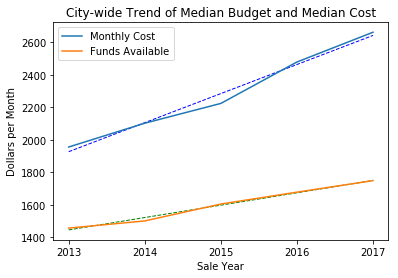

In [151]:
from scipy.stats import linregress

city_wide =final_df_reduced.median()
city_wide_comparison_df = pd.DataFrame({"Monthly Cost":city_wide.iloc[1:6], 'Funds Available':[1457,1501,1605,1678,1749]})
x = np.arange(1,6,1)
(cost_slope, cost_int, _, _, _) = linregress(x, city_wide_comparison_df["Monthly Cost"])
cost_fit = cost_slope * x + cost_int
(funds_slope, funds_int, _, _, _) = linregress(x, city_wide_comparison_df['Funds Available'])
funds_fit = funds_slope * x + funds_int
plt.plot(x,cost_fit, color="b", linestyle='dashed', linewidth=1)
plt.plot(x,funds_fit, color="g", linestyle='dashed', linewidth=1)
targets = ['2013','2014','2015','2016','2017']
plt.plot(x,city_wide_comparison_df["Monthly Cost"])
plt.plot(x,city_wide_comparison_df["Funds Available"])
plt.title("City-wide Trend of Median Budget and Median Cost")
plt.ylabel("Dollars per Month")
plt.xlabel("Sale Year")
plt.xticks(range(1,len(x)+1),targets)
plt.legend()
plt.savefig('citywide_median_and_cost.png')
plt.show()
#print(cost_slope,cost_int,funds_slope,funds_int)
#city_wide_comparison_df 
#city_wide

In [152]:
final_df_2013.to_csv('final_2013_mls_zip.csv')
final_df_2014.to_csv('final_2014_mls_zip.csv')
final_df_2015.to_csv('final_2015_mls_zip.csv')
final_df_2016.to_csv('final_2016_mls_zip.csv')
final_df_2017.to_csv('final_2017_mls_zip.csv')

4.822884456033176


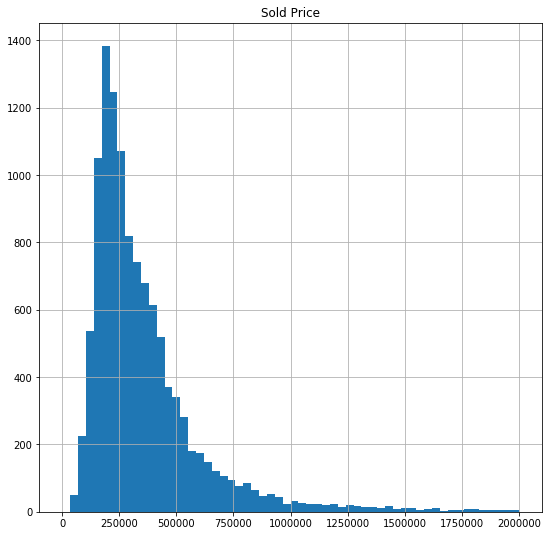

In [153]:
#random_list_ = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

import scipy.stats as stats

import random
import math
w = pd.DataFrame(df_2013['Sold Price']).hist(bins=58,
                                  range=(0,2000000),
                                  figsize=(9,9))

print( stats.skew(df_2013['Sold Price']))
plt.savefig('2013_histo.png')
plt.show()